In [1]:
import re
import pandas as pd

In [2]:
f = open('WhatsApp Chat with Mini Militia 😂😂.txt','r',encoding = "UTF-8")

In [3]:
data = f.read()

In [4]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s(?:AM|PM)\s-\s'

In [5]:
data = data.replace('\u202f', ' ')
messages = re.split(pattern,data)[1:]

In [6]:
dates = re.findall(pattern,data)

In [7]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
# convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %I:%M %p - ')
df.head()

,user_message,message_date
0,Messages and calls are end-to-end encrypted. O...,2024-12-19 23:00:00
1,"Rajeev created group ""Mini militia 😂😂""\n",2024-12-19 23:00:00
2,Rajeev added you\n,2024-12-19 23:00:00
3,Rajeev updated the message timer. New messages...,2024-12-19 23:00:00
4,You're now an admin\n,2024-12-19 23:01:00


In [8]:
df.shape

(7162, 2)

In [9]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split(r'([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)
df.head()

,message_date,user,message
0,2024-12-19 23:00:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2024-12-19 23:00:00,group_notification,"Rajeev created group ""Mini militia 😂😂""\n"
2,2024-12-19 23:00:00,group_notification,Rajeev added you\n
3,2024-12-19 23:00:00,group_notification,Rajeev updated the message timer. New messages...
4,2024-12-19 23:01:00,group_notification,You're now an admin\n


In [10]:
df.rename(columns={'message_date': 'date'}, inplace=True)

In [11]:
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [12]:
df.head()

,date,user,message,year,month_num,month,day,day_name,hour,minute
0,2024-12-19 23:00:00,group_notification,Messages and calls are end-to-end encrypted. O...,2024,12,December,19,Thursday,23,0
1,2024-12-19 23:00:00,group_notification,"Rajeev created group ""Mini militia 😂😂""\n",2024,12,December,19,Thursday,23,0
2,2024-12-19 23:00:00,group_notification,Rajeev added you\n,2024,12,December,19,Thursday,23,0
3,2024-12-19 23:00:00,group_notification,Rajeev updated the message timer. New messages...,2024,12,December,19,Thursday,23,0
4,2024-12-19 23:01:00,group_notification,You're now an admin\n,2024,12,December,19,Thursday,23,1


In [13]:
df['only_date'] = df['date'].dt.date

In [14]:
df.head()

,date,user,message,year,month_num,month,day,day_name,hour,minute,only_date
0,2024-12-19 23:00:00,group_notification,Messages and calls are end-to-end encrypted. O...,2024,12,December,19,Thursday,23,0,2024-12-19
1,2024-12-19 23:00:00,group_notification,"Rajeev created group ""Mini militia 😂😂""\n",2024,12,December,19,Thursday,23,0,2024-12-19
2,2024-12-19 23:00:00,group_notification,Rajeev added you\n,2024,12,December,19,Thursday,23,0,2024-12-19
3,2024-12-19 23:00:00,group_notification,Rajeev updated the message timer. New messages...,2024,12,December,19,Thursday,23,0,2024-12-19
4,2024-12-19 23:01:00,group_notification,You're now an admin\n,2024,12,December,19,Thursday,23,1,2024-12-19


In [17]:
from urlextract import URLExtract # type: ignore
extractor = URLExtract()
url = extractor.find_urls("hello check out my website https://www.google.com and also my github github.com/rohit-ml")

In [21]:
link = []
for message in df['message']:
    link.extend(extractor.find_urls(message))

link

['https://www.instagram.com/reel/DDqxUvnyWfV/?igsh=d3M5cjZiczgxaWto',
 'https://apkpure.net/mini-militia-classic-da2-mmc/com.appsomniacs.mmc/downloading',
 'https://www.instagram.com/reel/DDSG_8vP0cS/?igsh=MWxteTg0ZDBkdW1leg==',
 'https://www.instagram.com/reel/DDlAn74pcoZ/?igsh=MW4yeDh0MDlmb241eQ==',
 'https://www.instagram.com/reel/DDzc2B9SDTs/?igsh=MWZqd3A0dGk3OWN5dg==',
 'https://www.youtube.com/watch?v=4ahCtd30C34',
 'https://www.youtube.com/watch?v=KzXpfxRzVQM',
 'https://www.youtube.com/watch?v=uuot9ItgTEI',
 'https://www.instagram.com/reel/DCqnWyozjNz/?igsh=MXV0eXdrNWljeW14YQ==',
 'https://www.instagram.com/reel/DDRmhkTz1Pu/?igsh=MWUzdnlneHgzdWw4Yg==',
 'https://www.instagram.com/reel/DD5PKw_TFmc/?igsh=MWh4cGM2MGttcTkxdA==',
 'https://chatgpt.com/share/677a6624-1650-8011-98ee-07076f0aa7cb',
 'https://chatgpt.com/share/677a88c4-eb04-8011-8732-649f5b34de2d',
 'https://chatgpt.com/share/677a88e2-f44c-8011-99fa-922d0fbd1bee',
 'https://chatgpt.com/share/677a88fa-4d00-8011-adc7-fa82

In [22]:
len(link)

253

In [31]:
df['user'].value_counts().head()

user
Rajeev                    2220
Aadarsh Tiwari            2126
Arpit Jadon                929
Aakrisht Goel              627
Harsh (Biradari Sec-A)     336
Name: count, dtype: int64

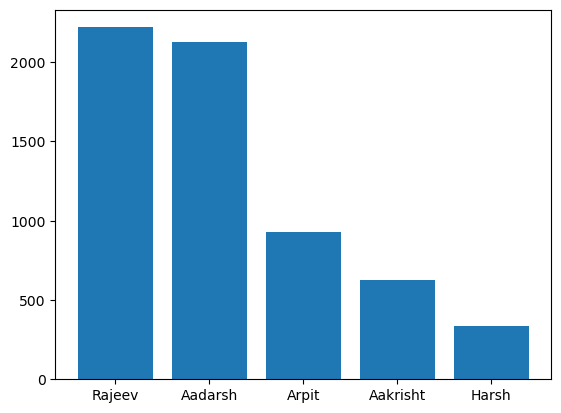

In [33]:
import matplotlib.pyplot as plt
x = df['user'].value_counts().head()
value = x.values
names = x.index.tolist()
first_names = [name.split()[0] for name in names]
plt.bar(first_names,value)

plt.show()

In [36]:
new_df = round((df['user'].value_counts()/df.shape[0])*100,2).reset_index()

In [37]:
new_df

,user,count
0,Rajeev,31.00
1,Aadarsh Tiwari,29.68
2,Arpit Jadon,12.97
3,Aakrisht Goel,8.75
4,Harsh (Biradari Sec-A),4.69
5,Rohit Aggarwal,4.55
6,+91 63879 74334,3.92
7,+91 88811 45073,1.87
8,Deepak (Niet),1.55
9,group_notification,0.61


In [39]:
temp = df[df['message'] != '<Media omitted>\n']
temp = temp[temp['message'] != 'This message was deleted\n']
temp = temp[temp['user'] != 'group_notification']


In [42]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        words.append(word)

from collections import Counter
Counter(words).most_common(20)

[('h', 675),
 ('to', 640),
 ('nhi', 501),
 ('bhai', 487),
 ('rha', 393),
 ('hain', 373),
 ('the', 325),
 ('ke', 316),
 ('and', 291),
 ('ka', 275),
 ('se', 275),
 ('kya', 272),
 ('bhi', 261),
 ('ko', 260),
 ('hai', 254),
 ('ki', 252),
 ('me', 248),
 ('hi', 245),
 ('ye', 243),
 ('tha', 230)]

In [43]:
df['month_num'] = df['date'].dt.month

In [44]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()
timeline.head()

,year,month_num,month,message
0,2024,12,December,718
1,2025,1,January,187
2,2025,2,February,251
3,2025,3,March,1554
4,2025,4,April,1387


In [48]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

timeline['time'] = time
timeline

,year,month_num,month,message,time
0,2024,12,December,718,December-2024
1,2025,1,January,187,January-2025
2,2025,2,February,251,February-2025
3,2025,3,March,1554,March-2025
4,2025,4,April,1387,April-2025
5,2025,5,May,866,May-2025
6,2025,6,June,1701,June-2025
7,2025,7,July,498,July-2025


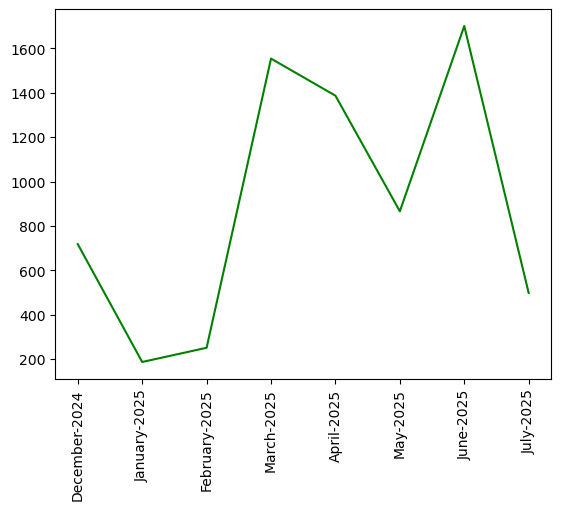

In [47]:
plt.plot(timeline['time'],timeline['message'],color='green')
plt.xticks(rotation='vertical')
plt.show()